In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

In [2]:
def bandpass(start, stop, data, fs = 200):
    bp_Hz = np.array([start, stop])
    b, a = signal.butter(5, bp_Hz / (fs / 2.0), btype='bandpass')
    return signal.lfilter(b, a, data, axis=0)

def notch(val, data, fs= 200):
    notch_freq_Hz = np.array([float(val)])
    for freq_Hz in np.nditer(notch_freq_Hz):
        bp_stop_Hz = freq_Hz + 3.0 * np.array([-1, 1])
        b, a = signal.butter(3, bp_stop_Hz / (fs / 2.0), 'bandstop')
        fin = data = signal.lfilter(b, a, data)
    return fin

In [3]:
#Fast Fourier transform
def fft(data, fs):
    L = len(data)
    freq = np.linspace(0.0, 1.0 / (2.0 * fs **-1), L // 2)
    yi = np.fft.fft(data)[1:]
    y = yi[range(int(L / 2))]
    return freq, abs(y)

fs = 1000

In [4]:
n_60_bp_15_50 = pd.read_csv('OpenBCI-RAW-test_BP_15-50.txt', sep=",", header=None).as_matrix()
#data recorded by https://github.com/Vyachez

In [5]:
# raw channels
channels = []
for i in range(8):
    channels.append(n_60_bp_15_50[:,1+i].astype(np.float))
t = len(channels[0])/fs
time = np.linspace(0, t, len(channels[0]))

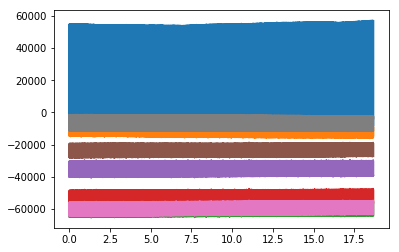

In [6]:
for i in range(len(channels)):
    plt.plot(time,channels[i])

(0, 100)

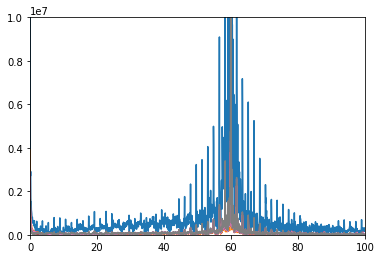

In [7]:
# fft of raw channels
for i in range(len(channels)):
    freq, y = fft(channels[i], fs)
    plt.plot(freq, y)
plt.ylim(0, 1e7)
plt.xlim(0,100)

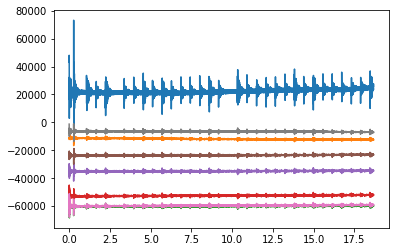

In [8]:
#applied notch filter = 60
notch_channels = []
for i in range(len(channels)):
    notch_channels.append(notch(60,channels[i], fs = fs))
for i in range(len(notch_channels)):
    plt.plot(time, notch_channels[i])

(0, 100)

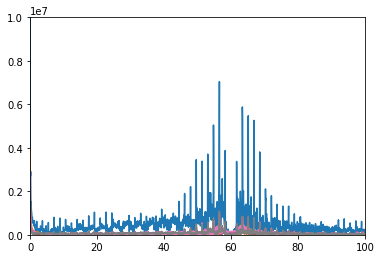

In [9]:
# fft of applied notch
for i in range(len(notch_channels)):
    freq, y = fft(notch_channels[i], fs)
    plt.plot(freq, y)
plt.ylim(0, 1e7)
plt.xlim(0,100)

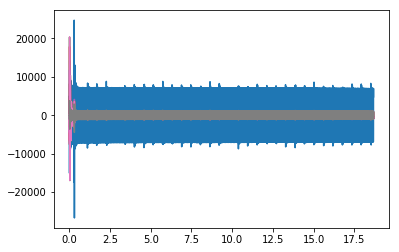

In [10]:
#applied bandpass filter = 5-50
band = (15,50)
bandpass_channels = []
for i in range(len(channels)):
    bandpass_channels.append(bandpass(band[0],band[1],channels[i], fs = fs))
    
for i in range(len(bandpass_channels)):
    plt.plot(time, bandpass_channels[i])

(0, 100)

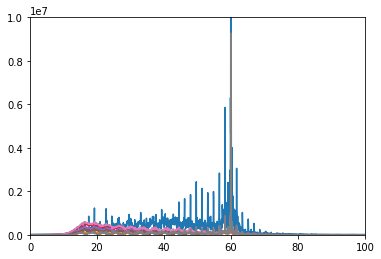

In [11]:
# fft of applied bandpass
for i in range(len(bandpass_channels)):
    freq, y = fft(bandpass_channels[i], fs)
    plt.plot(freq, y)
plt.ylim(0, 1e7)
plt.xlim(0,100)

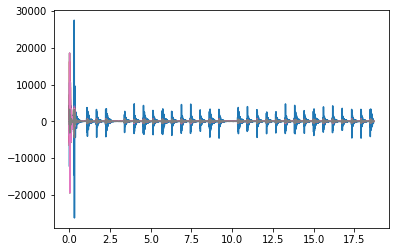

In [12]:
#applied bandpass filter = 5-50 and notch = 60
bandpass_notch_channels = []
for i in range(len(notch_channels)):
    bandpass_notch_channels.append(bandpass(band[0],band[1],notch_channels[i], fs = fs))
    
for i in range(len(bandpass_notch_channels)):
    plt.plot(time, bandpass_notch_channels[i])

(0, 100)

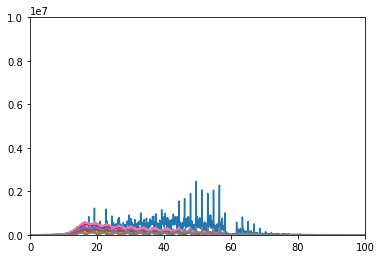

In [13]:
# fft of applied bandpass and notch
for i in range(len(bandpass_notch_channels)):
    freq, y = fft(bandpass_notch_channels[i], fs)
    plt.plot(freq, y)
plt.ylim(0, 1e7)
plt.xlim(0,100)

Fft plots show, that data: OpenBCI-RAW-test_BP_15-50.txt recorded with applied bandpass: 5-15 and notch: 60 in OpenBCI_GUI, were saved as raw.